In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib

In [3]:
def calc_volume(a,b,c):
    
    v = a*b*c*np.pi*4./3.
    
    return v

In [8]:
base_path1 = 'E:/bacteria_data/microscope_images/11-18-21/ecoli/results.csv'
base_path2 = 'E:/bacteria_data/microscope_images/1-25-22/ecoli2/results.csv'
base_path3 = 'E:/bacteria_data/microscope_images/12-17-21/staph/results.csv'

In [20]:
df1 = pd.read_csv(base_path1).iloc[:,1:]
df2 = pd.read_csv(base_path2).iloc[:,1:]
df3 = pd.read_csv(base_path3).iloc[:,1:]

df1['particle'] = 'ecoli'
df2['particle'] = 'ecoli2'
df3['particle']='staph'

df1 = df1[(np.abs(stats.zscore(df1['Major'])) < 3)|(np.abs(stats.zscore(df1['Minor'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['Major'])) < 3)|(np.abs(stats.zscore(df2['Minor'])) < 3)]
df3 = df3[(np.abs(stats.zscore(df3['Major'])) < 3)|(np.abs(stats.zscore(df3['Minor'])) < 3)]

df = pd.concat([df1,df2],ignore_index=True)

In [21]:
v_array = np.zeros(len(df))

for i in range(len(df)):
    
    event = df.iloc[i]
    a = event.Major/2
    b = c = event.Minor/2
    vol = calc_volume(a,b,c)
    
    v_array[i] = vol
df['volume'] = v_array

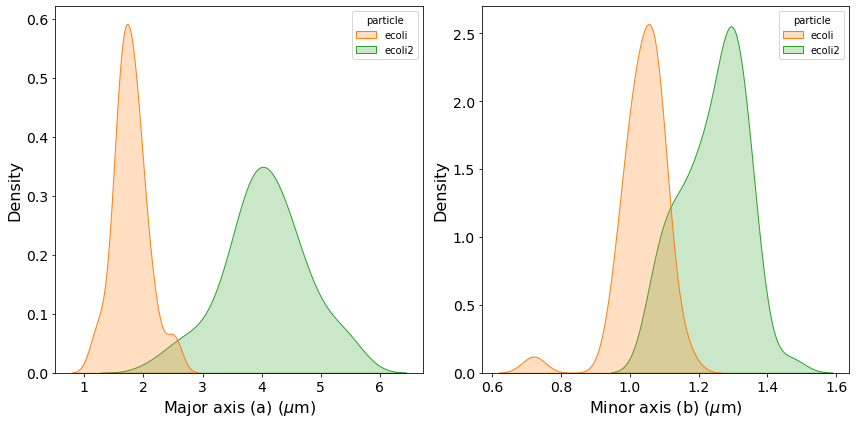

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

current_palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c')]
sns.kdeplot(data=df,x='Major',ax=ax1,hue='particle',shade=True,palette=current_palette)
sns.kdeplot(data=df,x='Minor',ax=ax2,hue='particle',shade=True,palette=current_palette)

ax1.set_xlabel('Major axis (a) ($\mu$m)',size=16)
ax2.set_xlabel('Minor axis (b) ($\mu$m)',size=16)

ax1.yaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('E:/bacteria_data/plots/microscope/ecoli_size_comparison.png',dpi=300)

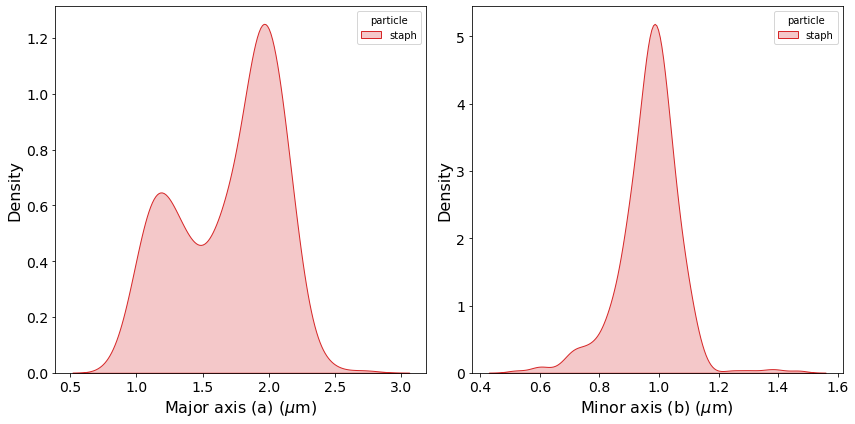

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))

current_palette = [matplotlib.colors.hex2color('#d62728')]
sns.kdeplot(data=df3,x='Major',ax=ax1,hue='particle',shade=True,palette=current_palette)
sns.kdeplot(data=df3,x='Minor',ax=ax2,hue='particle',shade=True,palette=current_palette)

ax1.set_xlabel('Major axis (a) ($\mu$m)',size=16)
ax2.set_xlabel('Minor axis (b) ($\mu$m)',size=16)

ax1.yaxis.label.set_size(16)
ax2.yaxis.label.set_size(16)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('E:/bacteria_data/plots/microscope/staph_size_comparison.png',dpi=300)

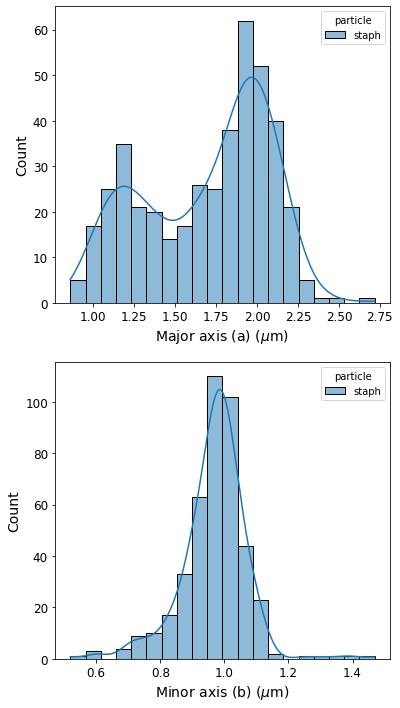

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(6,12))
sns.histplot(data=df3,x='Major',ax=ax1,hue='particle',kde=True,bins=20)
sns.histplot(data=df3,x='Minor',ax=ax2,hue='particle',kde=True,bins=20)

ax1.set_xlabel('Major axis (a) ($\mu$m)',size=14)
ax2.set_xlabel('Minor axis (b) ($\mu$m)',size=14)

ax1.yaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('D:/bacteria_data/plots/microscope/staph_size_comparison.png',dpi=300)

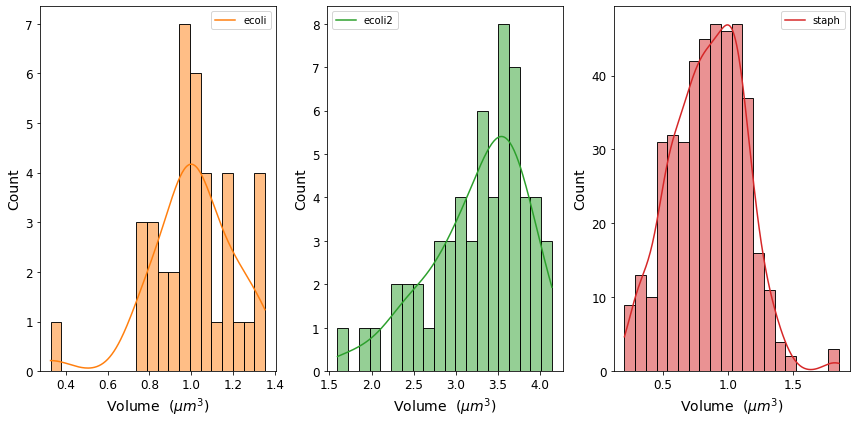

In [24]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(12,6))

current_palette = matplotlib.colors.hex2color('#ff7f0e')
sns.histplot(data=df[df.particle=='ecoli'],x='volume',kde='True',bins=20,ax=ax1,color=current_palette)

current_palette = matplotlib.colors.hex2color('#2ca02c')
sns.histplot(data=df[df.particle=='ecoli2'],x='volume',kde='True',bins=20,ax=ax2,color=current_palette)

current_palette = matplotlib.colors.hex2color('#d62728')
sns.histplot(data=df[df.particle=='staph'],x='volume',kde='True',bins=20,ax=ax3,color=current_palette)

ax1.legend(['ecoli'])
ax2.legend(['ecoli2'])
ax3.legend(['staph'])

ax1.set_xlabel('Volume  ($\mu m^3$)',size=14)
ax2.set_xlabel('Volume  ($\mu m^3$)',size=14)
ax3.set_xlabel('Volume  ($\mu m^3$)',size=14)

ax1.yaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)
ax3.yaxis.label.set_size(14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('D:/bacteria_data/plots/microscope/volume_comparison.png',dpi=300)

In [153]:
def calc_i(pore_d,pore_len,v):
    
    d = (6*v/np.pi)**(1./3)
    D = pore_d
    L = pore_len
    
    S = (1-0.8*((d/D)**3))**(-1)
    
    return  d**3/((D**2)*(L+0.8*D))*S

In [154]:
di_i = np.zeros(len(df))   
for i in range(len(df)):
    
    event = df.iloc[i]
    v = event.volume
    di = calc_i(2.363*2,12,v)
    
    di_i[i] = di

df['di_i'] = di_i

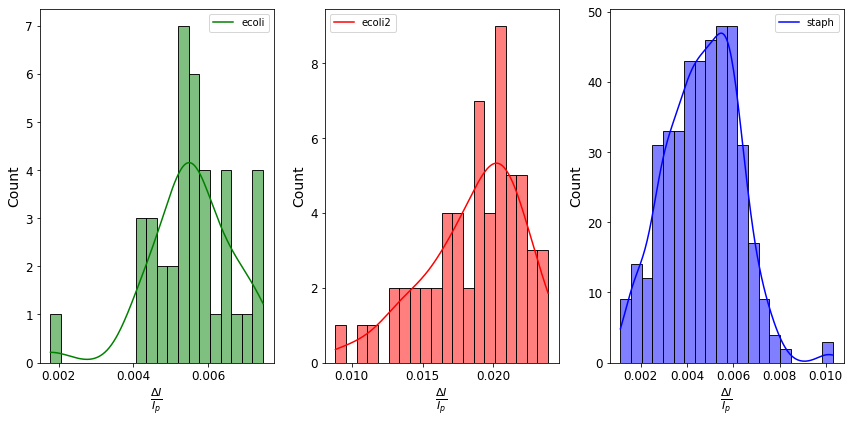

In [155]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(12,6))

sns.histplot(data=df[df.particle=='ecoli'],x='di_i',kde='True',bins=20,ax=ax1,color='green')
sns.histplot(data=df[df.particle=='ecoli2'],x='di_i',kde='True',bins=20,ax=ax2,color='red')
sns.histplot(data=df[df.particle=='staph'],x='di_i',kde='True',bins=20,ax=ax3,color='blue')

ax1.legend(['ecoli'])
ax2.legend(['ecoli2'])
ax3.legend(['staph'])

ax1.set_xlabel(r'$\frac{\Delta I}{I_p}$',size=16)
ax2.set_xlabel(r'$\frac{\Delta I}{I_p}$',size=16)
ax3.set_xlabel(r'$\frac{\Delta I}{I_p}$',size=16)

ax1.yaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)
ax3.yaxis.label.set_size(14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.savefig('D:/bacteria_data/plots/microscope/di_i_comparison.png',dpi=300)

In [157]:
df.to_pickle('D:/bacteria_data/microscope_images/df/dfm')